In [1]:
def find_closest_centroid(X, centroids):
    idx = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
        idx[i] = np.argmin(np.sqrt(np.sum((X[i,:]-centroids)**2, axis=1)))+1
    return idx

In [2]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
mat = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/archive/ex7data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [8]:
K = 3
initial_centroids = np.array(([3,3],[6,2],[8,5]))
idx = find_closest_centroid(mat['X'],initial_centroids)
print('Closest centroids for the first 3 examples:', idx[:3].T)
print('(the closest centroids should be 1, 3, 2 respectively)')

Closest centroids for the first 3 examples: [[1. 1. 1.]]
(the closest centroids should be 1, 3, 2 respectively)


In [9]:
def compute_centroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i,:] = np.mean(X[(idx==i+1).T[0], :], axis=0)
    return centroids

In [10]:
centroids = compute_centroids(mat['X'], idx, K)
print('Centroids computed after initial finding of closest centroids: \n', centroids)
print('\n(the centroids should be\n [ 2.428301 3.157924 ]\n[ 5.813503 2.633656 ]\n[ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids: 
 [[3.48343653 4.67666952]
 [5.24408518 4.66148767]
 [5.44433562 6.03683605]]

(the centroids should be
 [ 2.428301 3.157924 ]
[ 5.813503 2.633656 ]
[ 7.119387 3.616684 ]


In [28]:


def kmeans(X, initial_centroids, max_iters, plot_progress):
    if plot_progress:
        ncols = 3
        nrows = int(max_iters/ncols)
        if max_iters % ncols > 0:
            nrows = nrows + 1
        fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,nrows*8))
        ax_tuple = list(np.ndindex(nrows,ncols))
        for ax in ax_tuple[max_iters:]:
            axes[ax].set_axis_off()
        ax_tuple = ax_tuple[:max_iters]

    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids

    for i in range(max_iters):
        idx = find_closest_centroid(X, centroids)

        if plot_progress:
            plot_axes = [axes[axi] for axi in ax_tuple[i:]]
            axes[ax_tuple[i]].set_title('K-Means iteration {0}/{1}'.format(i+1, max_iters))
            plot_kmeans(X, centroids, previous_centroids, idx, K, plot_axes)
            previous_centroids = centroids
            previous_ax = plt.gca()
        else:
            print('K-Means iteration {0}/{1}'.format(i+1, max_iters))
        centroids = compute_centroids(X, idx, K)

    if plot_progress:
        plt.show()
    return centroids, idx



In [33]:
def plot_kmeans(X, centroids, previous_centroids, idx, K, ax):
    # Your implementation of the `plot_kmeans` function
    # ...
    from sklearn.datasets import load_iris
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=3, init=initial_centroids, max_iter=max_iters)
    kmeans.fit(mat['X'])
    centroids = kmeans.cluster_centers_
    idx = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cl

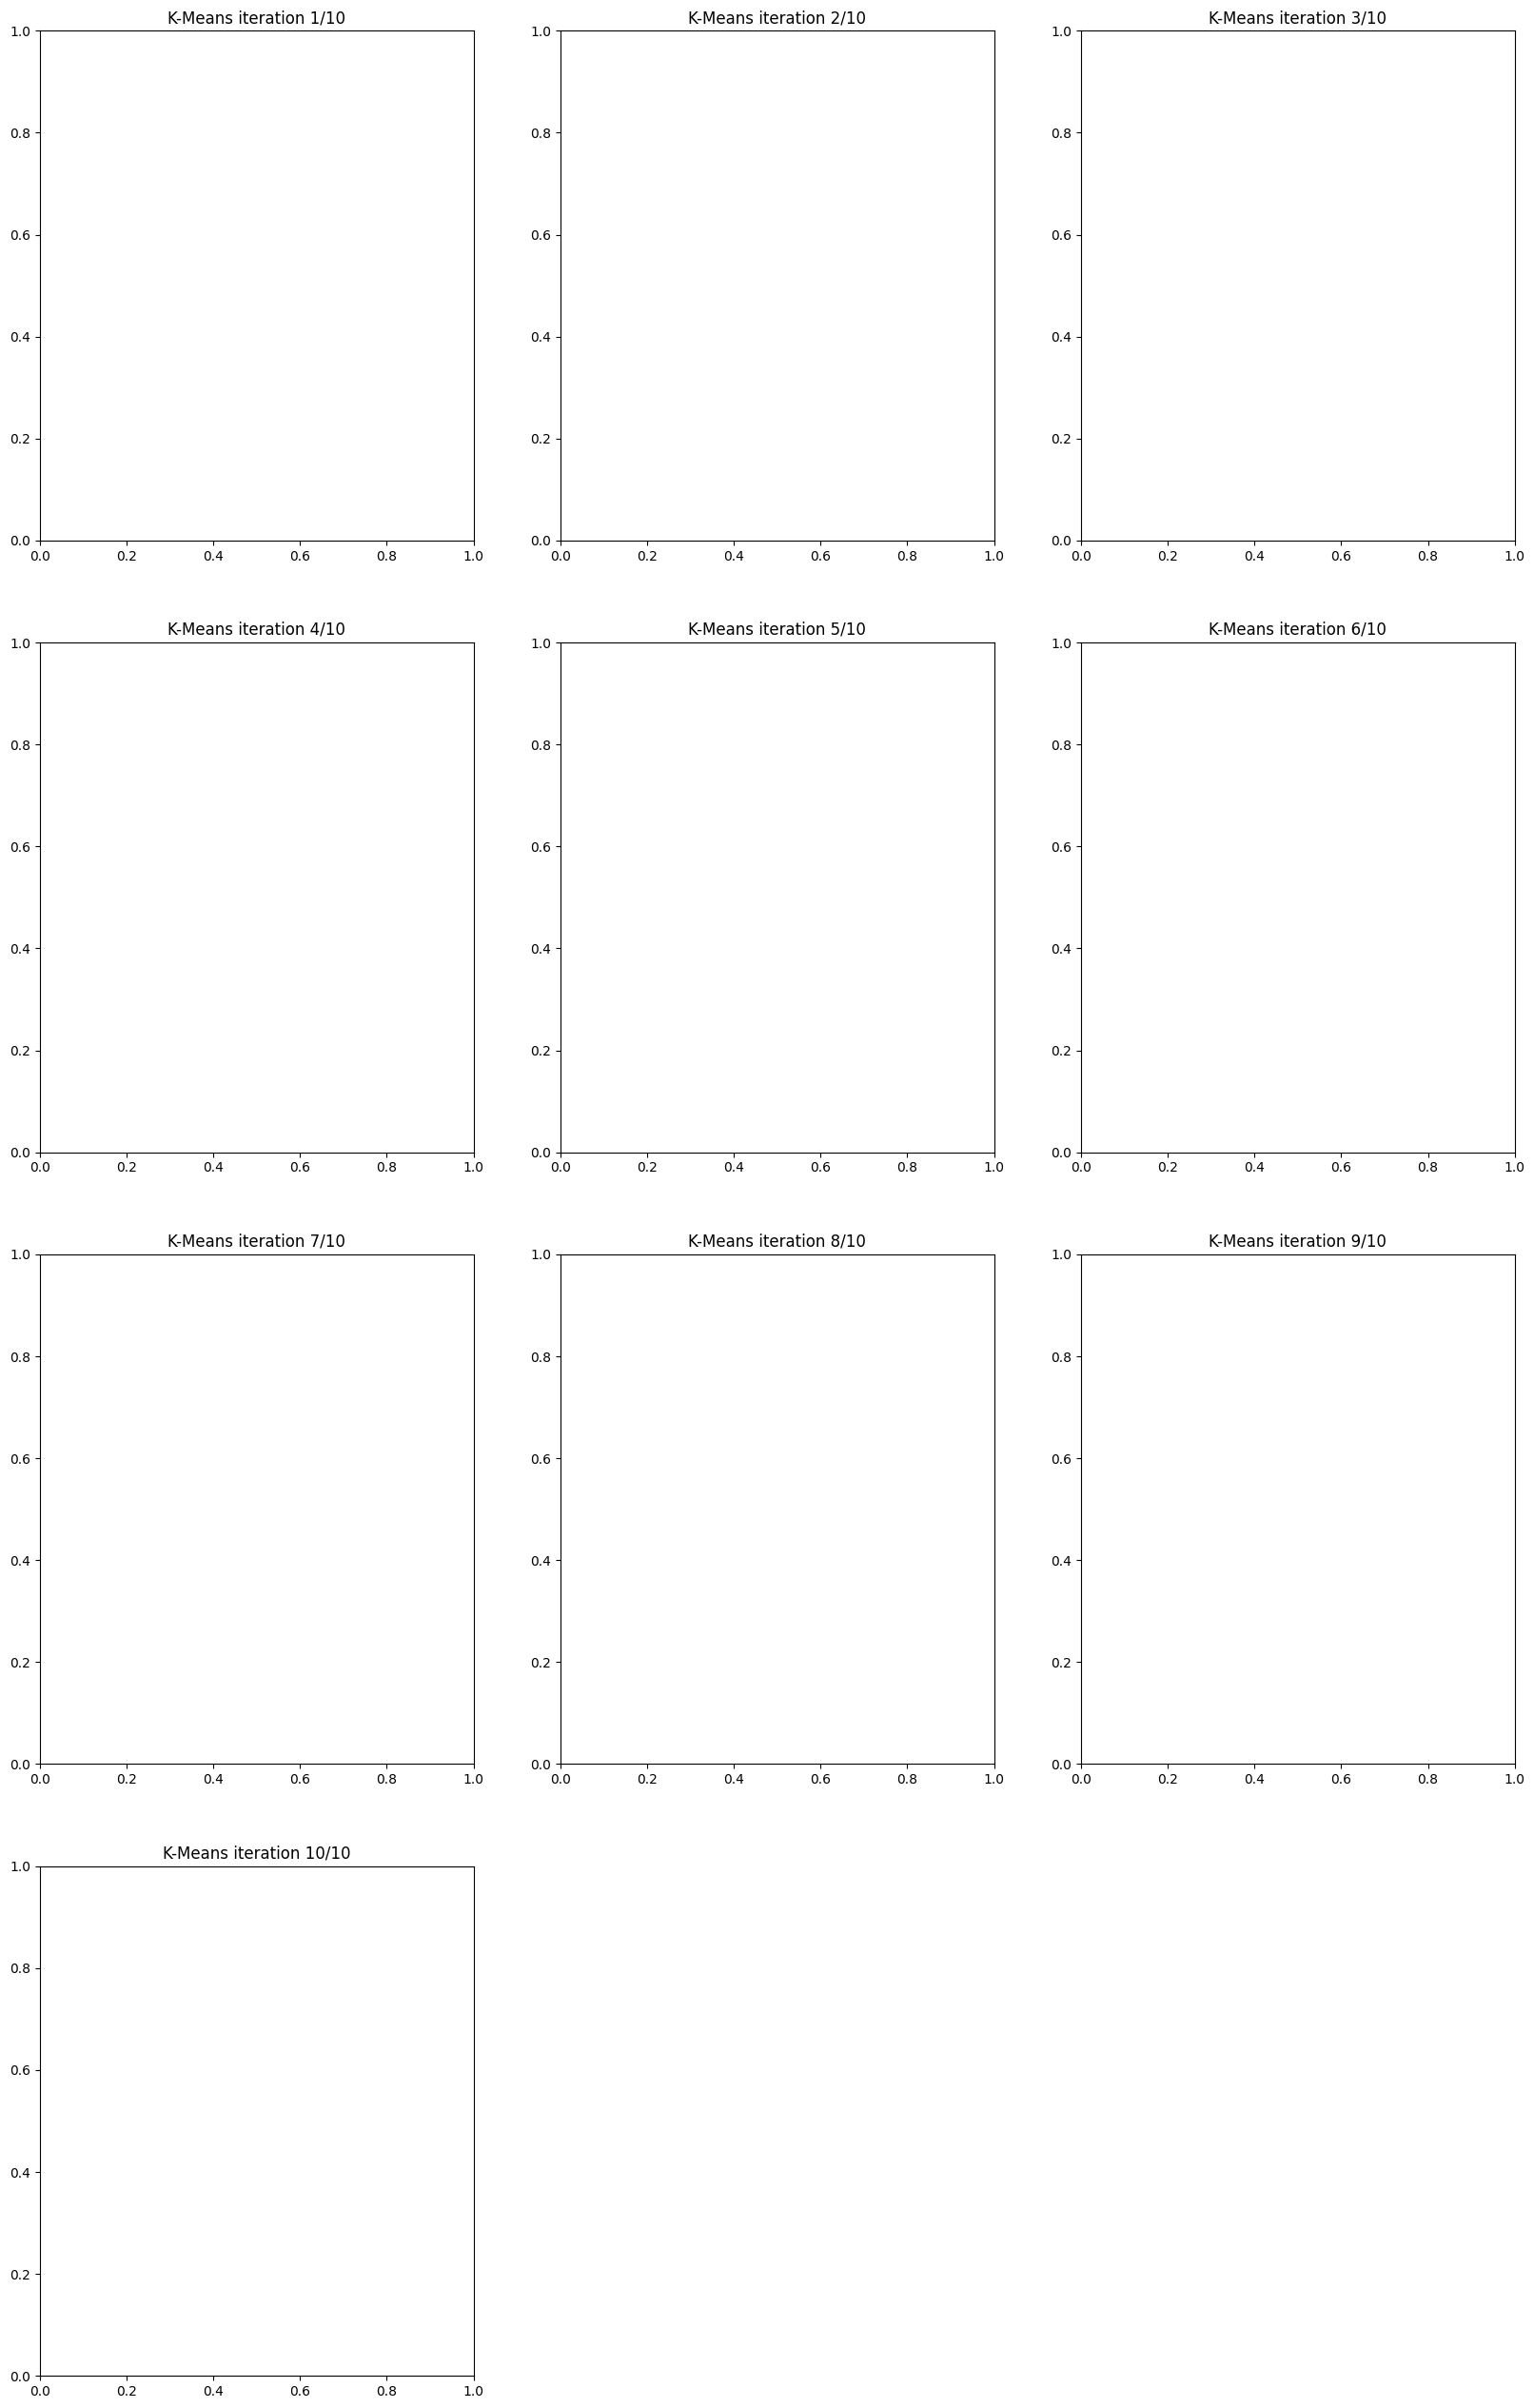

In [34]:
K = 3
max_iters = 10
initial_centroids = np.array([[3,3],[6,2],[8,5]])
centroids, idx = kmeans(mat['X'], initial_centroids, max_iters, True)

In [5]:
from scipy.io import loadmat
import pandas as pd

In [13]:
data = loadmat('/content/drive/MyDrive/Colab Notebooks/archive/ex7data1.mat')

In [14]:
df_data = data['X']

In [15]:
df = pd.DataFrame(df_data)

In [16]:
df

,0,1
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506
5,3.890672,6.488381
6,3.475805,3.632849
7,5.911298,6.680769
8,3.928894,5.098447
9,4.561835,5.623299


In [17]:
X = np.array(df)

In [18]:
X

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929],
       [4.57407171, 5.39765069],
       [4.37173356, 5.46116549],
       [4.19169388, 4.95469359],
       [5.24408518, 4.66148767],
       [2.8358402 , 3.76801716],
       [5.63526969, 6.31211438],
       [4.68632968, 5.6652411 ],
       [2.85051337, 4.62645627],
       [5.1101573 , 7.36319662],
       [5.18256377, 4.64650909],
       [5.70732809, 6.68103995],
       [3.57968458, 4.80278074],
       [5.63937773, 6.12043594],
       [4.26346851, 4.68942896],
       [2.53651693, 3.88449078],
       [3.22382902, 4.94255585],
       [4.92948801, 5.95501971],
       [5.79295774, 5.10839305],
       [2.81684824, 4.81895769],
       [3.88882414, 5.10036564],
       [3.

In [19]:
import random
init_centroids = random.sample(range(0,len(df)),3)
init_centroids

[28, 21, 13]

In [20]:
centroids = []
for i in init_centroids:
    centroids.append(df.loc[i])
centroids

[0    2.816848
 1    4.818958
 Name: 28, dtype: float64,
 0    3.579685
 1    4.802781
 Name: 21, dtype: float64,
 0    5.244085
 1    4.661488
 Name: 13, dtype: float64]

In [21]:
centroids = np.array(centroids)

In [22]:
centroids

array([[2.81684824, 4.81895769],
       [3.57968458, 4.80278074],
       [5.24408518, 4.66148767]])

In [23]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [24]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [25]:
get_centroids = findClosestCentroids(centroids, X)
get_centroids

[1,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 2]

In [26]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

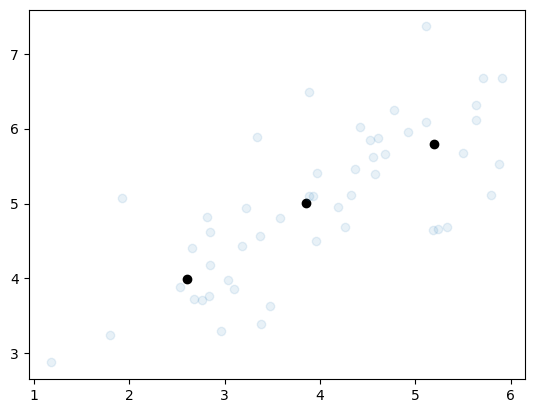

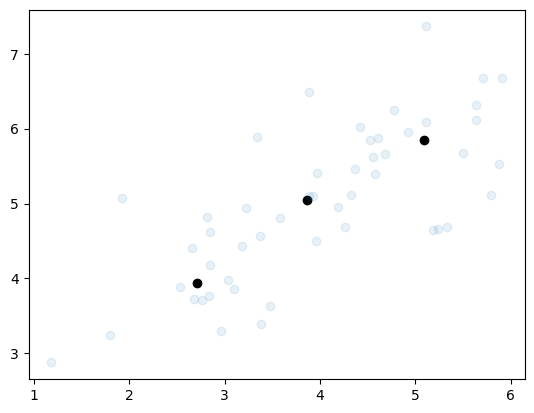

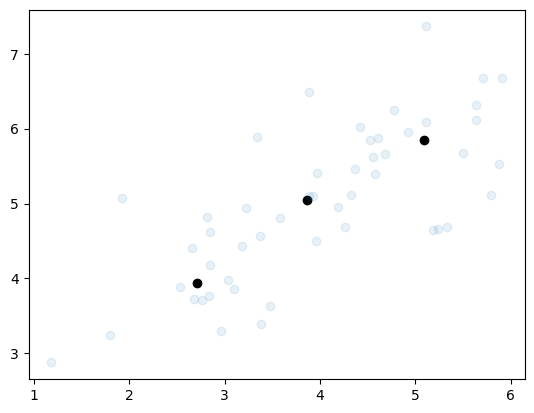

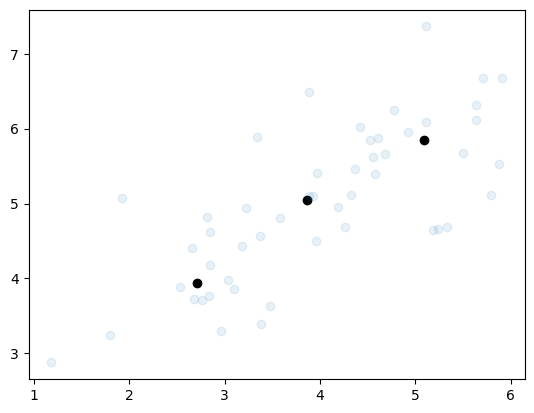

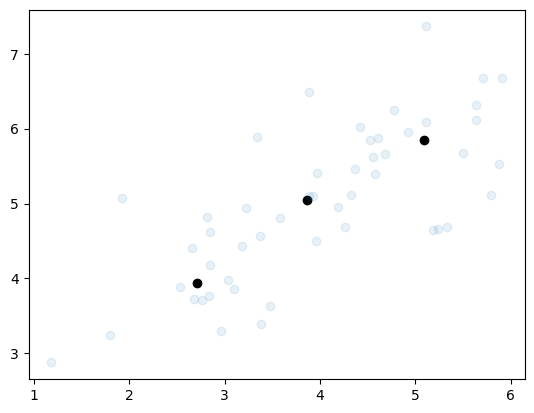

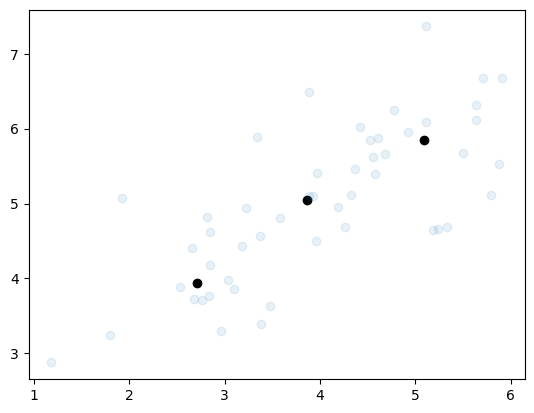

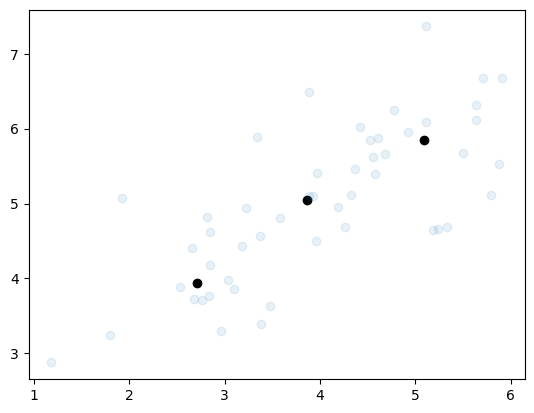

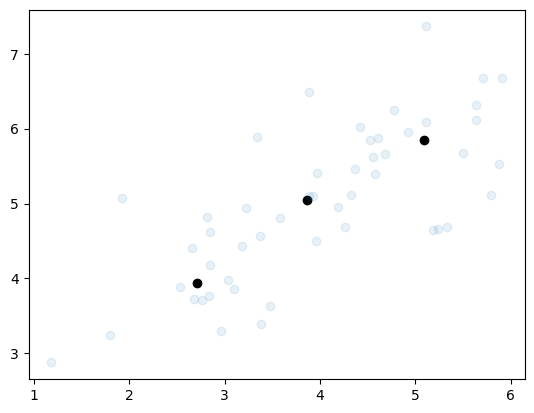

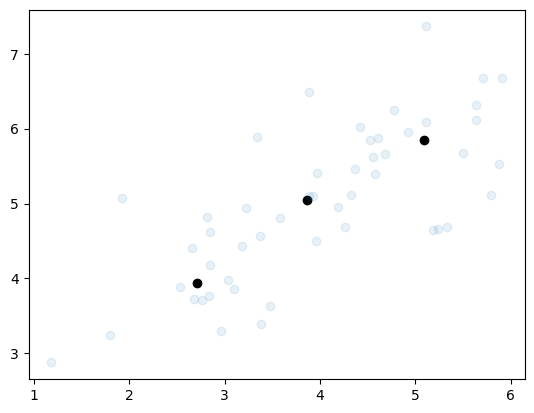

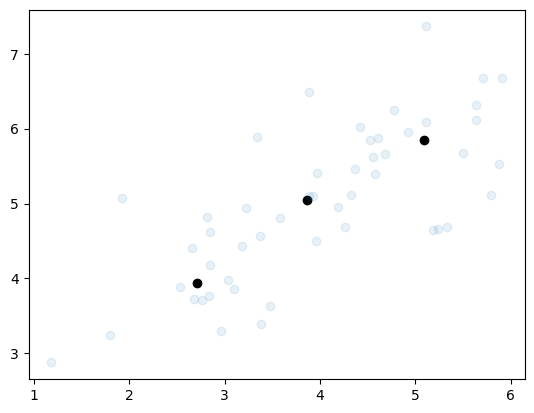

In [27]:
for i in range(10):
    get_centroids = findClosestCentroids(centroids, X)
    centroids = calc_centroids(get_centroids, X)
    #print(centroids)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
    plt.show()